In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# CLIMATE DAU 
partida_dau = pd.read_csv("dades/dades_csv/climatedau/game_partida.csv", delimiter=',' , encoding="latin-1")
ronda_dau = pd.read_csv("dades/dades_csv/climatedau/game_ronda.csv", delimiter=',' , encoding="latin-1")
user_dau = pd.read_csv("dades/dades_csv/climatedau/game_user.csv", delimiter=',' , encoding="latin-1")
user_dau.drop(user_dau.index[3], inplace=True)
userronda_dau = pd.read_csv("dades/dades_csv/climatedau/game_userronda.csv", delimiter=',' , encoding="latin-1")


In [3]:
# CLIMATE STREET 
partida_street = pd.read_csv("dades/dades_csv/climatestreet/game_partida_street.csv", delimiter=',' , encoding="latin-1")
ronda_street = pd.read_csv("dades/dades_csv/climatestreet/game_ronda_street.csv", delimiter=',' , encoding="latin-1")
user_street = pd.read_csv("dades/dades_csv/climatestreet/game_user_street.csv", delimiter=',' , encoding="latin-1")
userronda_street = pd.read_csv("dades/dades_csv/climatestreet/game_userronda_street.csv", delimiter=',' , encoding="latin-1")

In [4]:
# CLIMATE VIL
partida_vil = pd.read_csv("dades/dadesvil/partida.csv", delimiter=',' , encoding="latin-1")
ronda_vil = pd.read_csv("dades/dadesvil/ronda.csv", delimiter=',' , encoding="latin-1")
user_vil = pd.read_csv("dades/dadesvil/user.csv", delimiter=',' , encoding="latin-1")
userronda_vil = pd.read_csv("dades/dadesvil/userronda.csv", delimiter=',' , encoding="latin-1")

In [5]:
user_street.rename(columns={'id': 'user_id'}, inplace=True)
user_vil.rename(columns={'id': 'user_id'}, inplace=True)

In [6]:
user_dau.columns

Index(['user_id', 'nickname', 'codi_postal', 'genere', 'rang_edat',
       'nivell_estudis', 'prfinal0', 'prfinal1', 'prfinal2', 'prfinal3',
       'prfinal4', 'prfinal5', 'prfinal6', 'prfinal7', 'prfinal8', 'prfinal9',
       'prfinal10', 'prfinal11', 'prfinal12', 'prfinal13', 'data_creacio',
       'data_finalitzacio', 'acabat', 'data_registre', 'diners_inicials',
       'diners_actuals', 'check_1', 'check_2', 'check_3', 'partida_id',
       'is_robot', 'num_jugador', 'prfinal14', 'prfinal15', 'guany_final',
       'num_seleccions', 'sorteig'],
      dtype='object')

In [7]:
user_dau.head()

,user_id,nickname,codi_postal,genere,rang_edat,nivell_estudis,prfinal0,prfinal1,prfinal2,prfinal3,...,check_2,check_3,partida_id,is_robot,num_jugador,prfinal14,prfinal15,guany_final,num_seleccions,sorteig
0,1,Nitahorse,8203,d,28,r4,NaN,r1,r1,r4,...,False,False,1,0,3,r3,r2,12,10,1
1,2,Max demoran,8028,h,45,r4,NaN,r1,r1,r1,...,False,False,1,0,6,r2,r2,14,10,1
2,3,Ellas,8027,h,15,r2,NaN,r1,r1,r2,...,False,False,1,0,2,r4,r4,28,10,1
4,5,Peripam,8440,h,24,r6,NaN,r1,r2,r2,...,False,False,2,0,6,r3,r4,10,10,1
5,6,Pato,8027,d,14,r2,NaN,r1,r2,r2,...,False,False,1,0,1,r1,r3,16,10,1


In [8]:
ronda_dau.head()

,id,num_ronda,bucket_inici_ronda,bucket_final_ronda,temps_inici_ronda,temps_final_ronda,partida_id,calculada
0,1,1,120,102,2015-12-12 11:15:35.868141,2015-12-12 11:15:47.496505,1,1
1,2,2,102,82,2015-12-12 11:16:02.496505,2015-12-12 11:16:13.482420,1,1
2,3,3,82,61,2015-12-12 11:16:28.482420,2015-12-12 11:16:40.223503,1,1
3,4,4,61,49,2015-12-12 11:16:55.223503,2015-12-12 11:17:07.851955,1,1
4,5,5,49,36,2015-12-12 11:17:22.851955,2015-12-12 11:17:33.835103,1,1


In [9]:
userronda_dau.head()

,id,ha_seleccionat,seleccio,temps_seleccio,ronda_id,user_id
0,1,1,4,2015-12-12 11:15:47.488159,1,1
1,2,1,3,2015-12-12 11:15:40.016475,1,2
2,3,1,4,2015-12-12 11:15:41.971357,1,3
3,4,1,2,2015-12-12 11:15:40.065619,1,6
4,5,1,2,2015-12-12 11:15:39.146240,1,7


In [10]:
#tonorm = user_dau[['user_id','diners_inicials']]
#tocontr = pd.merge(userronda_dau,tonorm, on = 'user_id')
#tocontr['selnorm'] = tocontr['seleccio']/tocontr['diners_inicials']    
#tocontr[tocontr['user_id']==5]

In [ ]:
def contribution_round(user, userronda):
    tonorm = user[['user_id','diners_inicials']]
    tocontr = pd.merge(userronda,tonorm, on = 'user_id')
    #Normalization
    tocontr['selnorm'] = tocontr['seleccio']/tocontr['diners_inicials']
    rondes = np.arange(1,11)
    ronda_id = np.tile(rondes,len(np.unique(userronda['user_id']))) #324 users
    tocontr['ronda_id'] = ronda_id
    contr_round = pd.pivot(index = tocontr['user_id'], columns = tocontr['ronda_id'], values = tocontr['seleccio'])
    return contr_round

In [17]:
def contribution_norm_round(user, userronda, norm):
    tonorm = user[['user_id','diners_inicials']]
    tocontr = pd.merge(userronda,tonorm, on = 'user_id')
    #Normalization
    tocontr['selnorm'] = tocontr['seleccio']/tocontr['diners_inicials']
    rondes = np.arange(1,11)
    ronda_id = np.tile(rondes,len(np.unique(userronda['user_id']))) #324 users
    tocontr['ronda_id'] = ronda_id
    contr_round = pd.pivot(index = tocontr['user_id'], columns = tocontr['ronda_id'], values = tocontr[norm])
    return contr_round

In [22]:
# Normalized contributions per round
contr_dau_norm = contribution_norm_round(user_dau,userronda_dau, 'selnorm')
contr_dau = contribution_norm_round(user_dau,userronda_dau, 'seleccio')

In [23]:
contr_street_norm = contribution_norm_round(user_street,userronda_street, 'selnorm')
contr_street = contribution_norm_round(user_street,userronda_street, 'seleccio')

In [24]:
contr_vil_norm = contribution_norm_round(user_vil,userronda_vil, 'selnorm')
contr_vil = contribution_norm_round(user_vil,userronda_vil, 'seleccio')

In [15]:
#contr_vil

In [25]:
#Normalized mean contribution per user:
mean_contr_user_dau = contr_dau.mean(axis=1)
mean_contr_user_street = contr_street.mean(axis=1)
mean_contr_user_vil = contr_vil.mean(axis=1)

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

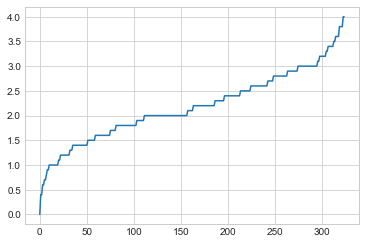

In [27]:
# Mean contribution per user: DAU
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, len(np.unique(userronda_dau['user_id'])), len(np.unique(userronda_dau['user_id'])))
ax.plot(x, np.sort(mean_contr_user_dau))

In [28]:
mean_contr_user_dau.describe()

count    324.000000
mean       2.178086
std        0.705868
min        0.000000
25%        1.775000
50%        2.100000
75%        2.700000
max        4.000000
dtype: float64

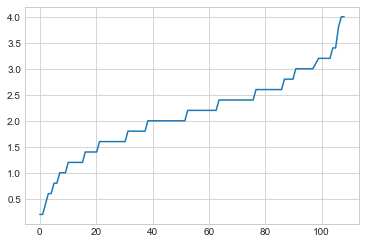

In [29]:
# Mean contribution per user: STREET
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, len(np.unique(userronda_street['user_id'])), len(np.unique(userronda_street['user_id'])))
ax.plot(x, np.sort(mean_contr_user_street))

In [30]:
mean_contr_user_street.describe()

count    108.000000
mean       2.117593
std        0.774093
min        0.200000
25%        1.600000
50%        2.200000
75%        2.600000
max        4.000000
dtype: float64

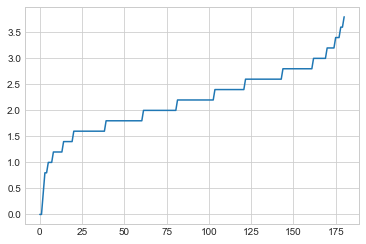

In [31]:
# Mean contribution per user: VIL
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, len(np.unique(userronda_vil['user_id'])), len(np.unique(userronda_vil['user_id'])))
ax.plot(x, np.sort(mean_contr_user_vil))

In [32]:
mean_contr_user_vil.describe()

count    180.000000
mean       2.172222
std        0.641494
min        0.000000
25%        1.800000
50%        2.200000
75%        2.600000
max        3.800000
dtype: float64

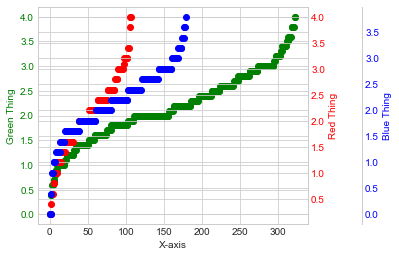

In [33]:
import matplotlib.pyplot as plt
import numpy as np
# To make things reproducible...
np.random.seed(1977)

fig, ax = plt.subplots()

# Twin the x-axis twice to make independent y-axes.
axes = [ax, ax.twinx(), ax.twinx()]

# Make some space on the right side for the extra y-axis.
fig.subplots_adjust(right=0.75)

# Move the last y-axis spine over to the right by 20% of the width of the axes
axes[-1].spines['right'].set_position(('axes', 1.2))

# To make the border of the right-most axis visible, we need to turn the frame
# on. This hides the other plots, however, so we need to turn its fill off.
axes[-1].set_frame_on(True)
axes[-1].patch.set_visible(False)


# And finally we get to plot things...
colors = ('Green', 'Red', 'Blue')
data = (np.sort(mean_contr_user_dau),np.sort(mean_contr_user_street),np.sort(mean_contr_user_vil))
for ax, color,data in zip(axes, colors,data):
    ax.plot(data, marker='o', linestyle='none', color=color)
    ax.set_ylabel('%s Thing' % color, color=color)
    ax.tick_params(axis='y', colors=color)
axes[0].set_xlabel('X-axis')

plt.show()

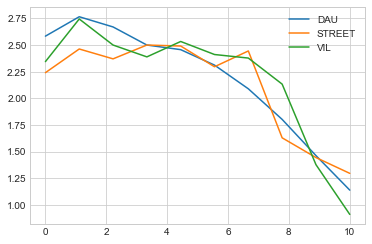

In [34]:
# Mean contribution per round
mean_contr_dau = contr_dau.mean(axis=0)
mean_contr_street= contr_street.mean(axis=0)
mean_contr_vil = contr_vil.mean(axis=0)
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 10)
ax.plot(x, mean_contr_dau,label="DAU")
ax.plot(x, mean_contr_street,label="STREET")
ax.plot(x, mean_contr_vil,label="VIL")
plt.legend()

### Strategies:

In [27]:
### Free Riding
#contr_dau.count(axis=1)
free_rid_dau = (contr_dau == 0).astype(int).sum(axis=1)

In [28]:
#np.sort(free_rid_dau)
#.sort_values(‘column_z’, ascending=False)

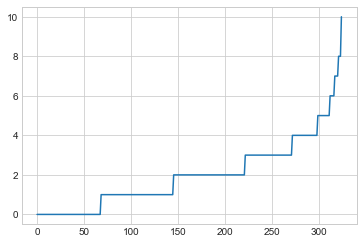

In [29]:
# Free Riding
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, len(np.unique(userronda_dau['user_id'])), len(np.unique(userronda_dau['user_id'])))
ax.plot(x, np.sort(free_rid_dau))

### Principal Component Analysis

In [35]:
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets.samples_generator import make_blobs
from pandas.tools.plotting import parallel_coordinates

#### DAU: 

In [36]:
### Unsupervised clustering (K-MEANS)
### La classe serà el valor del cluster que s'assigna amb un kmeans:
X = contr_dau_norm
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef

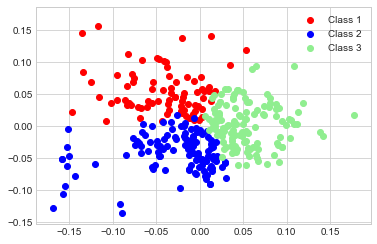

In [38]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(contr_dau_norm))

plt.scatter(transformed[y==0][0], transformed[y==0][1], label='Class 1', c='red')
plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 2', c='blue')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 3', c='lightgreen')
plt.legend()
plt.show()

#### Heterogeneous DAU:

In [40]:
ineq_dau_norm = pd.read_csv("dades/ineq_dau.csv", delimiter=',' , encoding="latin-1")
ineq_contr_dau = contr_dau_norm[contr_dau_norm.index.isin(ineq_dau_norm['user_id'])]

In [41]:
X = ineq_contr_dau
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef

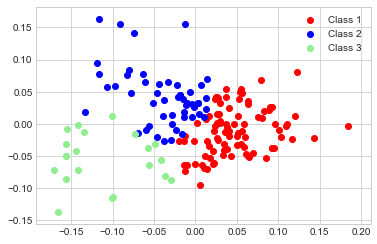

In [42]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(ineq_contr_dau))

plt.scatter(transformed[y==0][0], transformed[y==0][1], label='Class 1', c='red')
plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 2', c='blue')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 3', c='lightgreen')
plt.legend()
plt.show()

In [43]:
X = ineq_contr_dau
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef

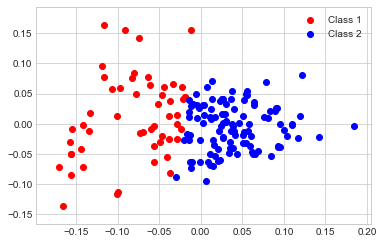

In [45]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(ineq_contr_dau))

plt.scatter(transformed[y==0][0], transformed[y==0][1], label='Class 1', c='red')
plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 2', c='blue')
#plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 3', c='lightgreen')
plt.legend()
plt.show()

#### Homogeneous DAU:

In [46]:
eq_dau = pd.read_csv("dades/eq_dau.csv", delimiter=',' , encoding="latin-1")
eq_contr_dau = contr_dau_norm[contr_dau_norm.index.isin(eq_dau['user_id'])]

In [47]:
X = eq_contr_dau
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef

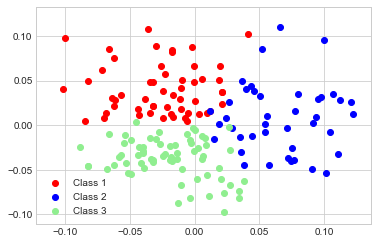

In [48]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(eq_contr_dau))

plt.scatter(transformed[y==0][0], transformed[y==0][1], label='Class 1', c='red')
plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 2', c='blue')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 3', c='lightgreen')
plt.legend()
plt.show()

In [41]:
X = eq_contr_dau
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef

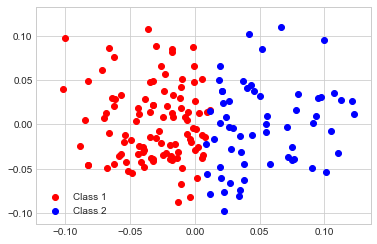

In [42]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(eq_contr_dau))

plt.scatter(transformed[y==0][0], transformed[y==0][1], label='Class 1', c='red')
plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 2', c='blue')
#plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 3', c='lightgreen')
plt.legend()
plt.show()

#### STREET:

In [49]:
### La classe serà el valor del cluster que s'assigna amb un kmeans:
X = contr_street_norm

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef

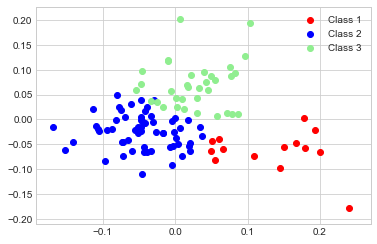

In [51]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(contr_street_norm))

plt.scatter(transformed[y==0][0], transformed[y==0][1], label='Class 1', c='red')
plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 2', c='blue')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 3', c='lightgreen')
plt.legend()
plt.show()

#### VIL:

In [45]:
### La classe serà el valor del cluster que s'assigna amb un kmeans:
X = contr_vil_norm
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef

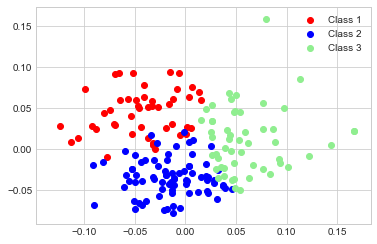

In [46]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(contr_vil_norm))

plt.scatter(transformed[y==0][0], transformed[y==0][1], label='Class 1', c='red')
plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 2', c='blue')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 3', c='lightgreen')
plt.legend()
plt.show()

### Inserting variables to PCA:

#### DAU:

In [47]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(contr_dau_norm))

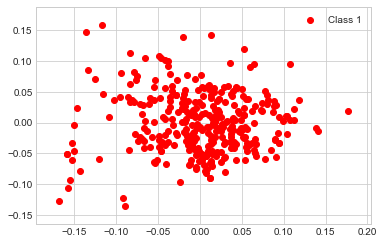

In [48]:
plt.scatter(transformed[0], transformed[1], label='Class 1', c='red')

plt.legend()
plt.show()

In [49]:
## genre
gen = np.asarray(user_dau['genere'])
gen_num = np.where(gen=='d',1,0)

In [50]:
np.unique(user_dau['diners_inicials'])

array([20, 30, 40, 50, 60], dtype=int64)

In [51]:
## diners inicials
din_in = np.asarray(user_dau['diners_inicials'])

In [52]:
for i in range(0,user_dau.shape[0]):
    if din_in[i] == 20:
        din_in[i]=0
    elif din_in[i] == 30:
        din_in[i]=1
    elif din_in[i] == 40:
        din_in[i]=2
    elif din_in[i] == 50:
        din_in[i]=3
    else:
        din_in[i]=4

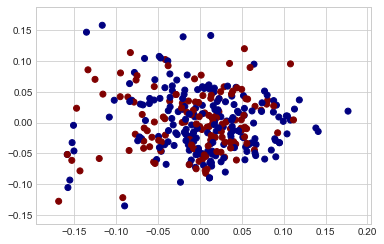

In [53]:
plt.scatter(transformed[0], transformed[1], c=gen_num) # According genre
plt.jet()

plt.show()

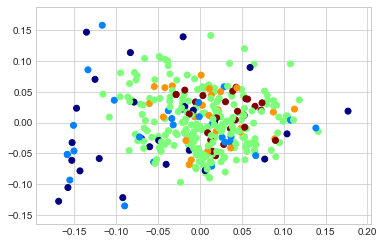

In [54]:
plt.scatter(transformed[0], transformed[1], c=din_in) # According initial budget
plt.jet()

plt.show()

#### Heterogeneous DAU:

In [55]:
ineq_dau = pd.read_csv("dades/ineq_dau.csv", delimiter=',' , encoding="latin-1")
ineq_contr_dau = contr_dau_norm[contr_dau_norm.index.isin(ineq_dau['user_id'])]

In [56]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(ineq_contr_dau))

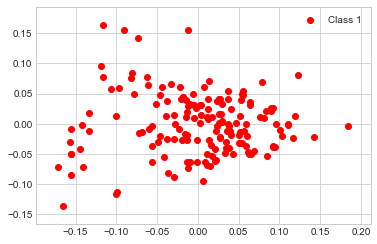

In [57]:
plt.scatter(transformed[0], transformed[1], label='Class 1', c='red')

plt.legend()
plt.show()

#### Homogeneous DAU: 

In [58]:
eq_dau = pd.read_csv("dades/eq_dau.csv", delimiter=',' , encoding="latin-1")
eq_contr_dau = contr_dau_norm[contr_dau_norm.index.isin(eq_dau['user_id'])]

In [59]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(eq_contr_dau))

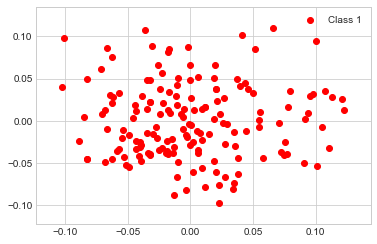

In [60]:
plt.scatter(transformed[0], transformed[1], label='Class 1', c='red')

plt.legend()
plt.show()

#### STREET:

In [61]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(contr_street_norm))

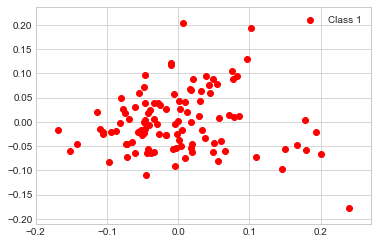

In [62]:
plt.scatter(transformed[0], transformed[1], label='Class 1', c='red')

plt.legend()
plt.show()

In [63]:
## genre
#gen = np.asarray(user_street[]['genere'])

gen = np.asarray(user_street.loc[user_street['user_id'].isin(np.unique(userronda_street['user_id']))]['genere'])
gen_num = np.where(gen=='d',1,0)

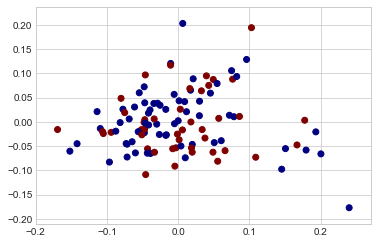

In [64]:
plt.scatter(transformed[0], transformed[1], c=gen_num) # According genre
plt.jet()

plt.show()

#### VIL:

In [65]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(contr_vil_norm))

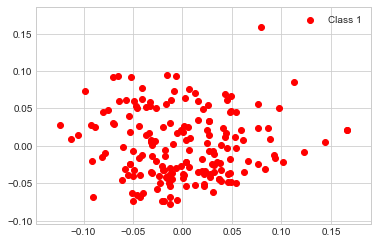

In [66]:
plt.scatter(transformed[0], transformed[1], label='Class 1', c='red')

plt.legend()
plt.show()

In [67]:
## genre
#gen = np.asarray(user_vil['genere'])
gen = np.asarray(user_vil.loc[user_vil['user_id'].isin(np.unique(userronda_vil['user_id']))]['genere'])

gen_num = np.where(gen=='F',1,0)

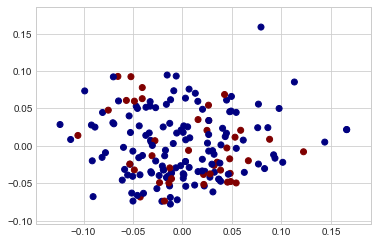

In [68]:
plt.scatter(transformed[0], transformed[1], c=gen_num) # According genre
plt.jet()

plt.show()

### Space partition

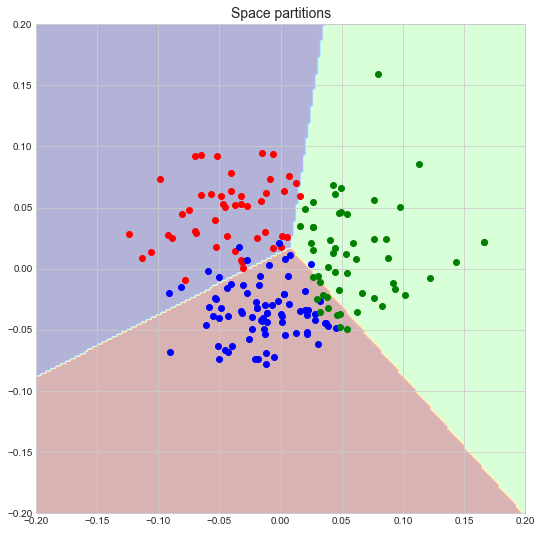

In [69]:
X = np.asarray(transformed)

from sklearn import cluster

K=3
clf = cluster.KMeans(init='random', n_clusters=K)
clf.fit(X)

plt.scatter(X[(y==0).ravel(),0],X[(y==0).ravel(),1],color='r')
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='b')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='g')

x = np.linspace(-0.20,0.20,200)
XX,YY = np.meshgrid(x,x)
sz=XX.shape
data=np.c_[XX.ravel(),YY.ravel()]

Z=clf.predict(data)
plt.imshow(Z.reshape(sz), interpolation='bilinear', origin='lower', extent=(-0.2,0.2,-0.2,0.2),alpha=0.3, vmin=0, vmax=K-1)
plt.title('Space partitions', size=14)
fig = plt.gcf()
fig.set_size_inches((9,9))

In [70]:
import numpy as np
from scipy.spatial import distance

def gaussian_kernel(xa,xb,gamma):
    d = distance.cdist(xa,xb,metric='euclidean')
    return np.exp(-d*gamma)

gamma = 2.
K = gaussian_kernel(X,X,gamma)
np.all(np.linalg.eigvals(K) > 0)

False

In [71]:
def train_svm(X,y,gamma,C,eta,n_iters):
    mom = 0.
    alpha = np.zeros((X.shape[0],1))
    K = gaussian_kernel(X,X,gamma)
    for i in range(n_iters):
        idx = np.random.randint(X.shape[0])
        xi,yi = X[idx,:],y[idx]
        if yi*np.dot(gaussian_kernel(xi[np.newaxis,:],X,gamma),alpha)<=1.:
            g = 2*np.dot(K,alpha) - C*yi*gaussian_kernel(xi[np.newaxis,:],X,gamma).T
        else:
            g = 2*np.dot(K,alpha) 
            
        mom = 0.9*mom - g
        alpha = alpha + eta*mom
    return alpha

def test_svm(xtest,X,alpha,gamma):
    return np.dot(gaussian_kernel(xtest,X,gamma),alpha)

In [72]:
gamma = 1e1
C = 1e-1
eta = 0.001

alpha = train_svm(X,y,gamma,C,eta,10000)

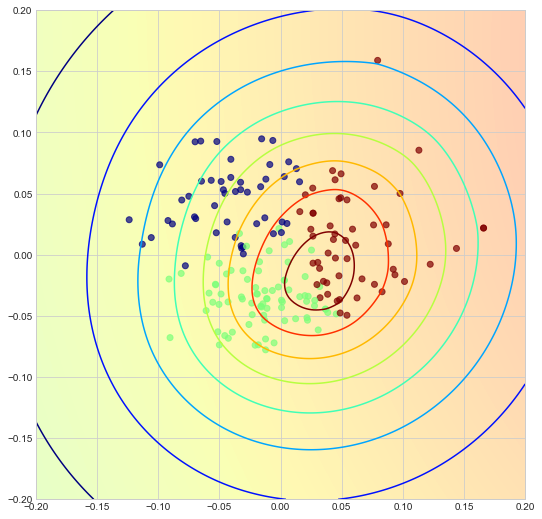

In [73]:
xx,yy = np.meshgrid(np.linspace(-0.2,0.2,200),np.linspace(-0.2,0.2,200))
viz=np.c_[xx.ravel(),yy.ravel()]

z = test_svm(viz,X,alpha,gamma)

plt.scatter(X[:, 0], X[:, 1], c=y,   alpha=0.7)
plt.gca().set_xlim([-0.2,0.2])
plt.gca().set_ylim([-0.2,0.2])
plt.imshow(z.reshape((200,200)), interpolation='bilinear', origin='lower', extent=(-2,3,-2,3),alpha=0.3)
plt.contour(xx,yy,z.reshape((200,200)))

plt.gcf().set_size_inches((9,9))

In [74]:
#from sklearn.model_selection import KFold 
#kf = KFold(n_splits=5, shuffle=True, random_state=None) 
#X = contr_round
#X = np.asarray(X)
#for train_index, test_index in kf.split(X):
#      #print("Train:", train_index, "Validation:",test_index)
#        
#        X_train, X_test = X[train_index], X[test_index] 
#        y_train, y_test = y[train_index], y[test_index]

In [75]:
#from sklearn.datasets import make_regression
#from sklearn.multioutput import MultiOutputRegressor
#from sklearn.ensemble import GradientBoostingRegressor
#X_train, y_train = make_regression(n_samples=10, n_targets=3, random_state=1)
#MultiOutputRegressor(GradientBoostingRegressor(random_state=0)).fit(X_train, y_train).predict(X_train)

### Classifiers: 

In [76]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [77]:
X = contr_dau_norm
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef
X = np.asarray(contr_dau_norm)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [78]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
kfold = model_selection.KFold(n_splits=5, random_state=7)
logreg = LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg')
scoring = 'accuracy'
results = model_selection.cross_val_score(logreg, X_train, y_train, cv=kfold, scoring=scoring)
print("5-fold cross validation average accuracy: %.3f" % (results.mean()))
logreg.fit(X_train, y_train)
print('Accuracy of LogisticRegression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of LogisticRegression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

5-fold cross validation average accuracy: 0.695
Accuracy of LogisticRegression classifier on training set: 0.76
Accuracy of LogisticRegression classifier on test set: 0.74


In [79]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(tree, X_train, y_train, cv=kfold, scoring=scoring)
print("5-fold cross validation average accuracy: %.3f" % (results.mean()))
tree.fit(X_train, y_train)
print('Accuracy of DecisionTree classifier on training set: {:.2f}'
     .format(tree.score(X_train, y_train)))
print('Accuracy of DecisionTree classifier on test set: {:.2f}'
     .format(tree.score(X_test, y_test)))

5-fold cross validation average accuracy: 0.726
Accuracy of DecisionTree classifier on training set: 1.00
Accuracy of DecisionTree classifier on test set: 0.75


In [80]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(knn, X_train, y_train, cv=kfold, scoring=scoring)
print("5-fold cross validation average accuracy: %.3f" % (results.mean()))
knn.fit(X_train, y_train)
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

5-fold cross validation average accuracy: 0.880
Accuracy of KNN classifier on training set: 0.94
Accuracy of KNN classifier on test set: 0.89


In [81]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
results = model_selection.cross_val_score(lda, X_train, y_train, cv=kfold, scoring=scoring)
print("5-fold cross validation average accuracy: %.3f" % (results.mean()))
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.3f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.3f}'
     .format(lda.score(X_test, y_test)))

5-fold cross validation average accuracy: 0.907
Accuracy of LDA classifier on training set: 0.942
Accuracy of LDA classifier on test set: 0.938


In [82]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
results = model_selection.cross_val_score(gnb, X_train, y_train, cv=kfold, scoring=scoring)
print("5-fold cross validation average accuracy: %.3f" % (results.mean()))
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.3f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.3f}'
     .format(gnb.score(X_test, y_test)))

5-fold cross validation average accuracy: 0.880
Accuracy of GNB classifier on training set: 0.934
Accuracy of GNB classifier on test set: 0.923


In [83]:
from sklearn.svm import SVC
svm = SVC()
results = model_selection.cross_val_score(svm, X_train, y_train, cv=kfold, scoring=scoring)
print("5-fold cross validation average accuracy: %.3f" % (results.mean()))

svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.3f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.3f}'
     .format(svm.score(X_test, y_test)))

5-fold cross validation average accuracy: 0.386
Accuracy of SVM classifier on training set: 0.390
Accuracy of SVM classifier on test set: 0.385


In [84]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = lda.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[14  0  3]
 [ 0 23  0]
 [ 0  1 24]]
             precision    recall  f1-score   support

          0       1.00      0.82      0.90        17
          1       0.96      1.00      0.98        23
          2       0.89      0.96      0.92        25

avg / total       0.94      0.94      0.94        65



### Linear Discriminant Analysis

The best classifier according the Kfold method for this data is the LDA so lets review what we would get. 

#### DAU:

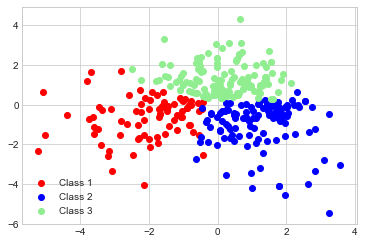

In [85]:
X = contr_dau_norm
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef


lda = LDA(n_components=2) #2-dimensional LDA
lda_transformed = pd.DataFrame(lda.fit_transform(X, y))

# Plot all three series
plt.scatter(lda_transformed[y==0][0], lda_transformed[y==0][1], label='Class 1', c='red')
plt.scatter(lda_transformed[y==1][0], lda_transformed[y==1][1], label='Class 2', c='blue')
plt.scatter(lda_transformed[y==2][0], lda_transformed[y==2][1], label='Class 3', c='lightgreen')

# Display legend and show plot
plt.legend(loc=3)
plt.show()

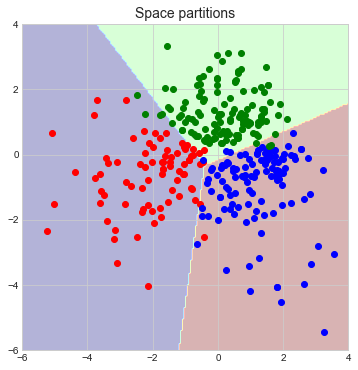

In [86]:
X = np.asarray(lda_transformed)

from sklearn import cluster

K=3
clf = cluster.KMeans(init='random', n_clusters=K)
clf.fit(X)

plt.scatter(X[(y==0).ravel(),0],X[(y==0).ravel(),1],color='r')
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='b')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='g')

x = np.linspace(-6,4,200)
XX,YY = np.meshgrid(x,x)
sz=XX.shape
data=np.c_[XX.ravel(),YY.ravel()]

Z=clf.predict(data)
plt.imshow(Z.reshape(sz), interpolation='bilinear', origin='lower', extent=(-6,4,-6,4),alpha=0.3, vmin=0, vmax=K-1)
plt.title('Space partitions', size=14)
fig = plt.gcf()
fig.set_size_inches((6,6))

#### Heterogeneous DAU:

In [83]:
X = ineq_contr_dau
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef


lda = LDA(solver='svd',n_components=2) #2-dimensional LDA
lda_transformed = pd.DataFrame(lda.fit_transform(X, y))

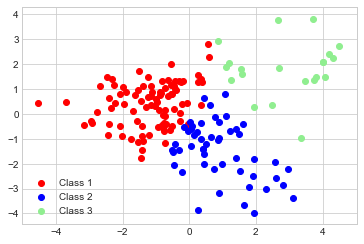

In [84]:
# Plot all three series
plt.scatter(lda_transformed[y==0][0], lda_transformed[y==0][1], label='Class 1', c='red')
plt.scatter(lda_transformed[y==1][0], lda_transformed[y==1][1], label='Class 2', c='blue')
plt.scatter(lda_transformed[y==2][0], lda_transformed[y==2][1], label='Class 3', c='lightgreen')

# Display legend and show plot
plt.legend(loc=3)
plt.show()

In [ ]:
X = ineq_contr_dau
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef

lda = LDA(n_components=2) #2-dimensional LDA
lda_transformed = pd.DataFrame(lda.fit_transform(X, y))

# Plot all three series
plt.scatter(lda_transformed[y==0][0], lda_transformed[y==0][1], label='Class 1', c='red')
plt.scatter(lda_transformed[y==1][0], lda_transformed[y==1][1], label='Class 2', c='blue')
#plt.scatter(lda_transformed[y==2][0], lda_transformed[y==2][1], label='Class 3', c='lightgreen')

# Display legend and show plot
plt.legend(loc=3)
plt.show()

#### Homogeneous DAU:

In [ ]:
X = eq_contr_dau
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef


lda = LDA(n_components=2) #2-dimensional LDA
lda_transformed = pd.DataFrame(lda.fit_transform(X, y))

# Plot all three series
plt.scatter(lda_transformed[y==0][0], lda_transformed[y==0][1], label='Class 1', c='red')
plt.scatter(lda_transformed[y==1][0], lda_transformed[y==1][1], label='Class 2', c='blue')
plt.scatter(lda_transformed[y==2][0], lda_transformed[y==2][1], label='Class 3', c='lightgreen')

# Display legend and show plot
plt.legend(loc=3)
plt.show()

#### STREET:

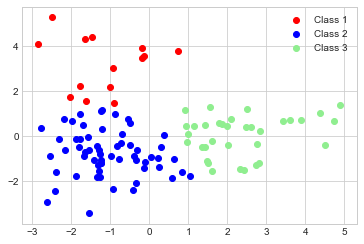

In [86]:
X = contr_street_norm
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef


lda = LDA(n_components=2) #2-dimensional LDA
lda_transformed = pd.DataFrame(lda.fit_transform(X, y))

# Plot all three series
plt.scatter(lda_transformed[y==0][0], lda_transformed[y==0][1], label='Class 1', c='red')
plt.scatter(lda_transformed[y==1][0], lda_transformed[y==1][1], label='Class 2', c='blue')
plt.scatter(lda_transformed[y==2][0], lda_transformed[y==2][1], label='Class 3', c='lightgreen')

# Display legend and show plot
plt.legend(loc=1)
plt.show()

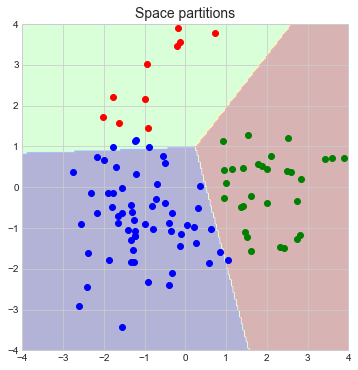

In [87]:
X = np.asarray(lda_transformed)

from sklearn import cluster

K=3
clf = cluster.KMeans(init='random', n_clusters=K)
clf.fit(X)

plt.scatter(X[(y==0).ravel(),0],X[(y==0).ravel(),1],color='r')
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='b')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='g')

x = np.linspace(-4,4,200)
XX,YY = np.meshgrid(x,x)
sz=XX.shape
data=np.c_[XX.ravel(),YY.ravel()]

Z=clf.predict(data)
plt.imshow(Z.reshape(sz), interpolation='bilinear', origin='lower', extent=(-4,4,-4,4),alpha=0.3, vmin=0, vmax=K-1)
plt.title('Space partitions', size=14)
fig = plt.gcf()
fig.set_size_inches((6,6))

#### VIL:

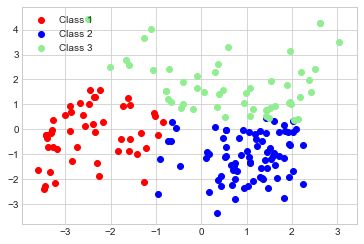

In [88]:
X = contr_vil_norm
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef


lda = LDA(n_components=2) #2-dimensional LDA
lda_transformed = pd.DataFrame(lda.fit_transform(X, y))

# Plot all three series
plt.scatter(lda_transformed[y==0][0], lda_transformed[y==0][1], label='Class 1', c='red')
plt.scatter(lda_transformed[y==1][0], lda_transformed[y==1][1], label='Class 2', c='blue')
plt.scatter(lda_transformed[y==2][0], lda_transformed[y==2][1], label='Class 3', c='lightgreen')

# Display legend and show plot
plt.legend(loc=2)
plt.show()

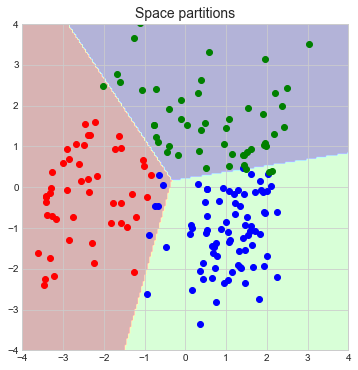

In [89]:
X = np.asarray(lda_transformed)

from sklearn import cluster

K=3
clf = cluster.KMeans(init='random', n_clusters=K)
clf.fit(X)

plt.scatter(X[(y==0).ravel(),0],X[(y==0).ravel(),1],color='r')
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='b')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='g')

x = np.linspace(-4,4,200)
XX,YY = np.meshgrid(x,x)
sz=XX.shape
data=np.c_[XX.ravel(),YY.ravel()]

Z=clf.predict(data)
plt.imshow(Z.reshape(sz), interpolation='bilinear', origin='lower', extent=(-4,4,-4,4),alpha=0.3, vmin=0, vmax=K-1)
plt.title('Space partitions', size=14)
fig = plt.gcf()
fig.set_size_inches((6,6))

## Identifying groups: 
### DAU

In [90]:
### Unsupervised clustering (K-MEANS)
### La classe serà el valor del cluster que s'assigna amb un kmeans:
X = contr_dau_norm
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef

clust1 = X.iloc[y == 0]
clust2 = X.iloc[y == 1]
clust3 = X.iloc[y == 2]

### 1: General Statistics per cluster

In [91]:
mean_contr_user_clust1 = clust1.mean(axis=1)
mean_contr_user_clust1.describe()

count    81.00000
mean      0.07071
std       0.01343
min       0.04500
25%       0.06000
50%       0.06750
75%       0.08000
max       0.10000
dtype: float64

In [92]:
mean_contr_user_clust2 = clust2.mean(axis=1)
mean_contr_user_clust2.describe()

count    117.000000
mean       0.063115
std        0.014939
min        0.045000
25%        0.052500
50%        0.060000
75%        0.070000
max        0.100000
dtype: float64

In [93]:
mean_contr_user_clust3 = clust3.mean(axis=1)
mean_contr_user_clust3.describe()

count    126.000000
mean       0.039386
std        0.009750
min        0.000000
25%        0.035000
50%        0.040000
75%        0.046667
max        0.055000
dtype: float64

### 2: Initial budget per cluster

In [94]:
users_clust1 = list(clust1.index)
users_clust2 = list(clust2.index)
users_clust3 = list(clust3.index)

In [95]:
user_dau = pd.read_csv("dades/dades_csv/climatedau/game_user.csv", delimiter=',' , encoding="latin-1")
user_dau.drop(user_dau.index[3], inplace=True)
din_in_clust1 = user_dau[user_dau['user_id'].isin(users_clust1)]['diners_inicials']
din_in_clust2 = user_dau[user_dau['user_id'].isin(users_clust2)]['diners_inicials']
din_in_clust3 = user_dau[user_dau['user_id'].isin(users_clust3)]['diners_inicials']

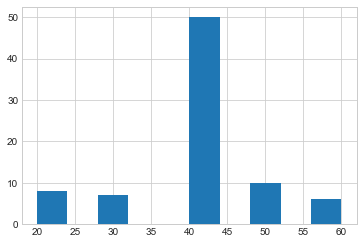

In [96]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
x = np.linspace(1, len(din_in_clust1), len(din_in_clust1))
#ax.set_title('Huber function')
#ax.set_xlabel('$u$')
#ax.set_ylabel(r'$\rho(u)$')
y = din_in_clust1
#plt.scatter(x, y, c="r")
plt.hist(y)
#plt.axhline(c="g")
#plt.axvline(c="g")
plt.show()

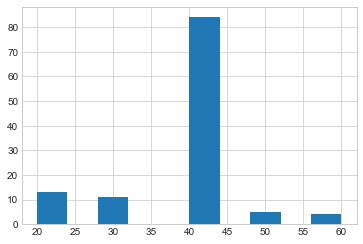

In [97]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
x = np.linspace(1, len(din_in_clust2), len(din_in_clust2))
#ax.set_title('Huber function')
#ax.set_xlabel('$u$')
#ax.set_ylabel(r'$\rho(u)$')
y = din_in_clust2
#plt.scatter(x, y, c="r")
plt.hist(y)
#plt.axhline(c="g")
#plt.axvline(c="g")
plt.show()

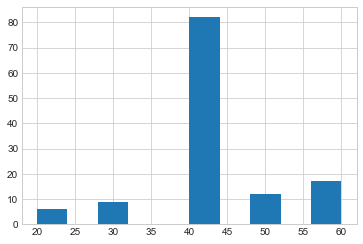

In [98]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
x = np.linspace(1, len(din_in_clust3), len(din_in_clust3))
#ax.set_title('Huber function')
#ax.set_xlabel('$u$')
#ax.set_ylabel(r'$\rho(u)$')
y = din_in_clust3
#plt.scatter(x, y, c="r")
plt.hist(y)
#plt.axhline(c="g")
#plt.axvline(c="g")
plt.show()

In [99]:
### T-Test to compare mean values:
from scipy import stats
stats.ttest_ind(din_in_clust1,din_in_clust2)
## As p-value < 0.1 --> Reject H0 of equal averages.

Ttest_indResult(statistic=1.5142044491221778, pvalue=0.13158490448678825)

In [100]:
### T-Test to compare mean values:
from scipy import stats
stats.ttest_ind(din_in_clust1,din_in_clust3)
## As p-value < 0.1 --> Reject H0 of equal averages.

Ttest_indResult(statistic=-1.5748250161870148, pvalue=0.1168388277989728)

In [101]:
### T-Test to compare mean values:
from scipy import stats
stats.ttest_ind(din_in_clust2,din_in_clust3)
## As p-value < 0.1 --> Reject H0 of equal averages.

Ttest_indResult(statistic=-3.5670975374776734, pvalue=0.00043533801912292634)

### STREET

In [93]:
def gen_stats_clust (contr_table,user_ds,n_clust):
    X = contr_table
    kmeans = KMeans(n_clusters=n_clust, random_state=0).fit(X)
    clustcoef = kmeans.labels_
    y = clustcoef
    clusters=[]
    print(np.unique(y))
    for i in np.unique(y):
        print(i)
        df = X.loc[y == i]
        clusters.append(df)
        print(df.mean(axis=1).describe())
        users_clust = list(df.index)
        din_in_clust = user_ds[user_ds['user_id'].isin(users_clust)]['diners_inicials']
        
        #Plot
        fig = plt.figure(figsize=(6,4))
        ax = fig.add_subplot(111)
        x = np.linspace(1, len(din_in_clust), len(din_in_clust))
        y = din_in_clust
        plt.hist(y)
        plt.show()
    return clusters

In [ ]:
gen_stats_clust (contr_street_norm,user_street,2)

In [95]:
### Unsupervised clustering (K-MEANS)
### La classe serà el valor del cluster que s'assigna amb un kmeans:
X = contr_street_norm
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef

clust1 = X.iloc[y == 0]
clust2 = X.iloc[y == 1]
clust3 = X.iloc[y == 2]

### 1: General Statistics per cluster

In [96]:
mean_contr_user_clust1 = clust1.mean(axis=1)
mean_contr_user_clust1.describe()

count    14.000000
mean      0.082976
std       0.016489
min       0.060000
25%       0.066667
50%       0.085000
75%       0.100000
max       0.100000
dtype: float64

In [97]:
mean_contr_user_clust2 = clust2.mean(axis=1)
mean_contr_user_clust2.describe()

count    60.000000
mean      0.040533
std       0.012805
min       0.005000
25%       0.034583
50%       0.041667
75%       0.050000
max       0.065000
dtype: float64

In [98]:
mean_contr_user_clust3 = clust3.mean(axis=1)
mean_contr_user_clust3.describe()

count    34.000000
mean      0.073794
std       0.013974
min       0.051667
25%       0.060000
50%       0.074167
75%       0.080000
max       0.100000
dtype: float64

### 2: Initial budget per cluster

In [99]:
users_clust1 = list(clust1.index)
users_clust2 = list(clust2.index)
users_clust3 = list(clust3.index)

din_in_clust1 = user_street[user_street['user_id'].isin(users_clust1)]['diners_inicials']
din_in_clust2 = user_street[user_street['user_id'].isin(users_clust2)]['diners_inicials']
din_in_clust3 = user_street[user_street['user_id'].isin(users_clust3)]['diners_inicials']

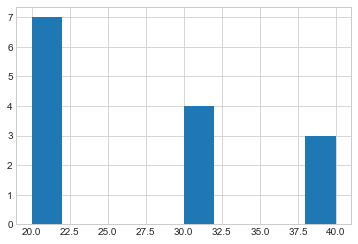

In [101]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
x = np.linspace(1, len(din_in_clust1), len(din_in_clust1))
#ax.set_title('Huber function')
#ax.set_xlabel('$u$')
#ax.set_ylabel(r'$\rho(u)$')
y = din_in_clust1
#plt.scatter(x, y, c="r")
plt.hist(y)
#plt.axhline(c="g")
#plt.axvline(c="g")
plt.show()

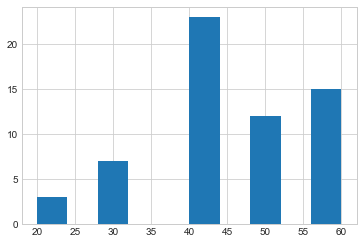

In [102]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
x = np.linspace(1, len(din_in_clust2), len(din_in_clust2))
#ax.set_title('Huber function')
#ax.set_xlabel('$u$')
#ax.set_ylabel(r'$\rho(u)$')
y = din_in_clust2
#plt.scatter(x, y, c="r")
plt.hist(y)
#plt.axhline(c="g")
#plt.axvline(c="g")
plt.show()

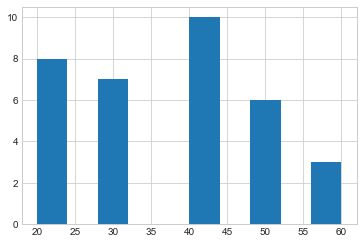

In [103]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
x = np.linspace(1, len(din_in_clust3), len(din_in_clust3))
#ax.set_title('Huber function')
#ax.set_xlabel('$u$')
#ax.set_ylabel(r'$\rho(u)$')
y = din_in_clust3
#plt.scatter(x, y, c="r")
plt.hist(y)
#plt.axhline(c="g")
#plt.axvline(c="g")
plt.show()

In [104]:
### T-Test to compare mean values:
from scipy import stats
stats.ttest_ind(din_in_clust1,din_in_clust2)
## As p-value < 0.1 --> Reject H0 of equal averages.

Ttest_indResult(statistic=-5.4586279632790582, pvalue=6.4701837785756842e-07)

In [105]:
### T-Test to compare mean values:
from scipy import stats
stats.ttest_ind(din_in_clust2,din_in_clust3)
## As p-value < 0.1 --> Reject H0 of equal averages.

Ttest_indResult(statistic=3.1569312741422118, pvalue=0.0021561385602864398)

In [106]:
### T-Test to compare mean values:
from scipy import stats
stats.ttest_ind(din_in_clust1,din_in_clust3)
## As p-value < 0.1 --> Reject H0 of equal averages.

Ttest_indResult(statistic=-2.6036471852092404, pvalue=0.012376486067399793)

### 2 clusters:

In [107]:
### Unsupervised clustering (K-MEANS)
### La classe serà el valor del cluster que s'assigna amb un kmeans:
X = contr_street_norm
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef

clust1 = X.iloc[y == 0]
clust2 = X.iloc[y == 1]


In [108]:
mean_contr_user_clust1 = clust1.mean(axis=1)
mean_contr_user_clust1.describe()

count    63.000000
mean      0.041016
std       0.012610
min       0.005000
25%       0.035000
50%       0.043333
75%       0.050000
max       0.060000
dtype: float64

In [109]:
mean_contr_user_clust2 = clust2.mean(axis=1)
mean_contr_user_clust2.describe()

count    45.000000
mean      0.078193
std       0.014136
min       0.060000
25%       0.066667
50%       0.080000
75%       0.090000
max       0.100000
dtype: float64

In [110]:
users_clust1 = list(clust1.index)
users_clust2 = list(clust2.index)

din_in_clust1 = user_street[user_street['user_id'].isin(users_clust1)]['diners_inicials']
din_in_clust2 = user_street[user_street['user_id'].isin(users_clust2)]['diners_inicials']

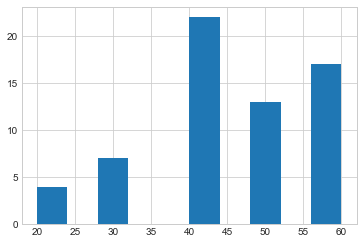

In [111]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
x = np.linspace(1, len(din_in_clust1), len(din_in_clust1))
#ax.set_title('Huber function')
#ax.set_xlabel('$u$')
#ax.set_ylabel(r'$\rho(u)$')
y = din_in_clust1
#plt.scatter(x, y, c="r")
plt.hist(y)
#plt.axhline(c="g")
#plt.axvline(c="g")
plt.show()

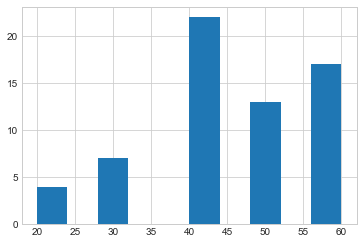

In [112]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
x = np.linspace(1, len(din_in_clust1), len(din_in_clust1))
#ax.set_title('Huber function')
#ax.set_xlabel('$u$')
#ax.set_ylabel(r'$\rho(u)$')
y = din_in_clust1
#plt.scatter(x, y, c="r")
plt.hist(y)
#plt.axhline(c="g")
#plt.axvline(c="g")
plt.show()

In [113]:
### T-Test to compare mean values:
from scipy import stats
stats.ttest_ind(din_in_clust1,din_in_clust2)
## As p-value < 0.1 --> Reject H0 of equal averages.

Ttest_indResult(statistic=5.4155599573308741, pvalue=3.8408702886598945e-07)

### VIL:

In [114]:
### Unsupervised clustering (K-MEANS)
### La classe serà el valor del cluster que s'assigna amb un kmeans:
X = contr_vil_norm
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef

clust1 = X.iloc[y == 0]
clust2 = X.iloc[y == 1]
clust3 = X.iloc[y == 2]

### 1: General Statistics

In [115]:
mean_contr_user_clust1 = clust1.mean(axis=1)
mean_contr_user_clust1.describe()

count    48.000000
mean      0.068229
std       0.010793
min       0.050000
25%       0.060000
50%       0.070000
75%       0.075000
max       0.095000
dtype: float64

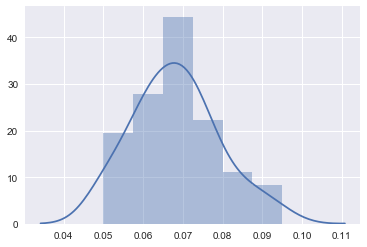

In [116]:
import seaborn as sns
sns.set(color_codes=True)

sns.distplot(mean_contr_user_clust1)

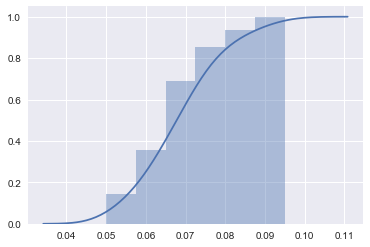

In [117]:
sns.distplot(mean_contr_user_clust1,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))

In [118]:
mean_contr_user_clust2 = clust2.mean(axis=1)
mean_contr_user_clust2.describe()

count    79.000000
mean      0.057595
std       0.009834
min       0.040000
25%       0.050000
50%       0.055000
75%       0.065000
max       0.085000
dtype: float64

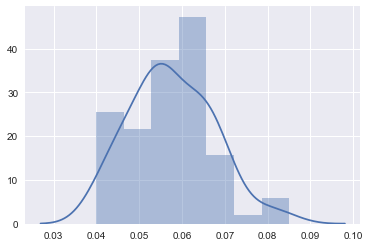

In [119]:
sns.distplot(mean_contr_user_clust2)

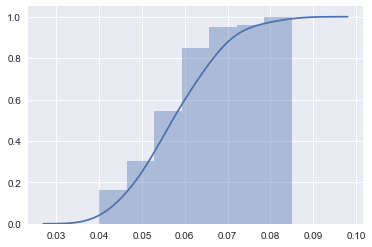

In [120]:
sns.distplot(mean_contr_user_clust2,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))

In [121]:
mean_contr_user_clust3 = clust3.mean(axis=1)
mean_contr_user_clust3.describe()

count    53.000000
mean      0.036792
std       0.011270
min       0.000000
25%       0.030000
50%       0.040000
75%       0.045000
max       0.050000
dtype: float64

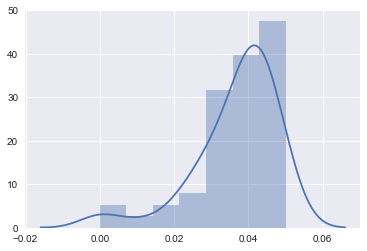

In [122]:
sns.distplot(mean_contr_user_clust3)

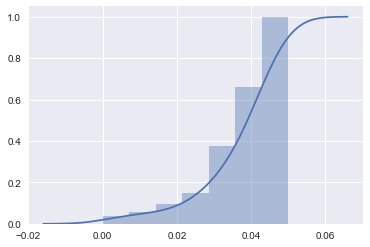

In [123]:
sns.distplot(mean_contr_user_clust3,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))

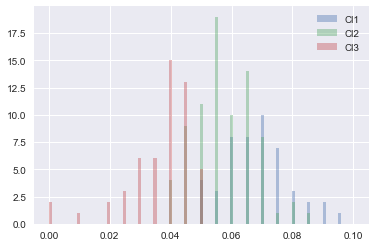

In [124]:
bins = np.linspace(0, 0.1, 100)

plt.hist(mean_contr_user_clust1, bins, alpha=0.4, label='Cl1')
plt.hist(mean_contr_user_clust2, bins, alpha=0.4, label='Cl2')
plt.hist(mean_contr_user_clust3, bins, alpha=0.4, label='Cl3')
plt.legend(loc='upper right')
plt.show()

In [125]:
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, yerr=menStd)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

NameError: name 'N' is not defined

In [126]:
### T-Test to compare mean values:
from scipy import stats
stats.ttest_ind(mean_contr_user_clust1,mean_contr_user_clust2)
## As p-value < 0.1 --> Reject H0 of equal averages.

Ttest_indResult(statistic=5.6941549185232745, pvalue=8.3839143407128732e-08)

In [127]:
### T-Test to compare mean values:
from scipy import stats
stats.ttest_ind(mean_contr_user_clust1,mean_contr_user_clust3)
## As p-value < 0.1 --> Reject H0 of equal averages.

Ttest_indResult(statistic=14.283465458342457, pvalue=8.6728515914237832e-26)

In [128]:
### T-Test to compare mean values:
from scipy import stats
stats.ttest_ind(mean_contr_user_clust2,mean_contr_user_clust3)
## As p-value < 0.1 --> Reject H0 of equal averages.

Ttest_indResult(statistic=11.230720539428621, pvalue=7.097678463901472e-21)

### Heterogeneous DAU: 

In [129]:
ineq_dau = pd.read_csv("dades/ineq_dau.csv", delimiter=',' , encoding="latin-1")
ineq_contr_dau = contr_dau_norm[contr_dau_norm.index.isin(ineq_dau['user_id'])]

In [130]:
### Unsupervised clustering (K-MEANS)
# El nombre òptim de clusters amb k-means és 2 per les contribucions dels casos amb desigualtat

X = ineq_contr_dau
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef

clust1 = X.iloc[y == 0]
clust2 = X.iloc[y == 1]
#clust3 = X.iloc[y == 2]

### 1: General Statistics per cluster

In [131]:
mean_contr_user_clust1 = clust1.mean(axis=1)
mean_contr_user_clust1.describe()

count    53.000000
mean      0.082522
std       0.013669
min       0.060000
25%       0.070000
50%       0.080000
75%       0.100000
max       0.100000
dtype: float64

In [132]:
mean_contr_user_clust2 = clust2.mean(axis=1)
mean_contr_user_clust2.describe()

count    109.000000
mean       0.045261
std        0.012420
min        0.000000
25%        0.040000
50%        0.046667
75%        0.055000
max        0.065000
dtype: float64

### 2: Initial budget per cluster

In [133]:
users_clust1 = list(clust1.index)
users_clust2 = list(clust2.index)
#users_clust3 = list(clust3.index)

In [134]:
#user_dau = pd.read_csv("dades/dades_csv/climatedau/game_user.csv", delimiter=',' , encoding="latin-1")
#user_dau.drop(user_dau.index[3], inplace=True)
din_in_clust1 = user_dau[user_dau['user_id'].isin(users_clust1)]['diners_inicials']
din_in_clust2 = user_dau[user_dau['user_id'].isin(users_clust2)]['diners_inicials']
#din_in_clust3 = user_dau[user_dau['user_id'].isin(users_clust3)]['diners_inicials']

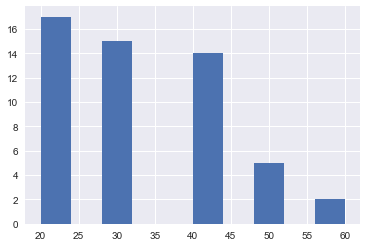

In [135]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
x = np.linspace(1, len(din_in_clust1), len(din_in_clust1))
#ax.set_title('Huber function')
#ax.set_xlabel('$u$')
#ax.set_ylabel(r'$\rho(u)$')
y = din_in_clust1
#plt.scatter(x, y, c="r")
plt.hist(y)
#plt.axhline(c="g")
#plt.axvline(c="g")
plt.show()

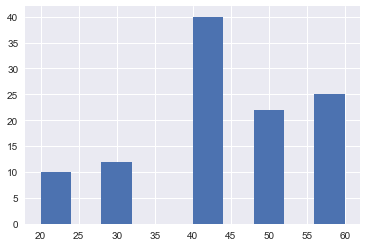

In [136]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
x = np.linspace(1, len(din_in_clust2), len(din_in_clust2))
#ax.set_title('Huber function')
#ax.set_xlabel('$u$')
#ax.set_ylabel(r'$\rho(u)$')
y = din_in_clust2
#plt.scatter(x, y, c="r")
plt.hist(y)
#plt.axhline(c="g")
#plt.axvline(c="g")
plt.show()

In [137]:
### T-Test to compare mean values:
from scipy import stats
stats.ttest_ind(din_in_clust1,din_in_clust2)
## As p-value < 0.1 --> Reject H0 of equal averages.

Ttest_indResult(statistic=-5.6468634337114052, pvalue=7.2829487544687928e-08)

### Homogeneous DAU:

In [138]:
eq_dau = pd.read_csv("dades/eq_dau.csv", delimiter=',' , encoding="latin-1")
eq_contr_dau = contr_dau_norm[contr_dau_norm.index.isin(eq_dau['user_id'])]

In [139]:
eq_contr_dau.to_csv('dades/eq_contr_dau.csv' ,sep=',', index=False)

In [140]:
### Unsupervised clustering (K-MEANS)
# El nombre òptim de clusters amb k-means és 4 per les contribucions dels casos amb desigualtat

X = eq_contr_dau
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef

clust1 = X.iloc[y == 0]
clust2 = X.iloc[y == 1]
clust3 = X.iloc[y == 2]
#clust4 = X.iloc[y == 3]

### 1: General Statistics per cluster

In [141]:
mean_contr_user_clust1 = clust1.mean(axis=1)
mean_contr_user_clust1.describe()

count    54.000000
mean      0.039907
std       0.008687
min       0.015000
25%       0.035000
50%       0.040000
75%       0.046875
max       0.052500
dtype: float64

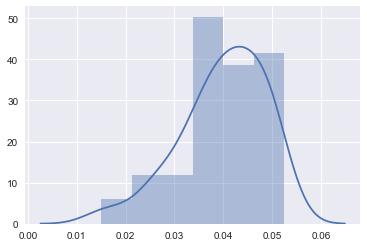

In [142]:
sns.distplot(mean_contr_user_clust1)

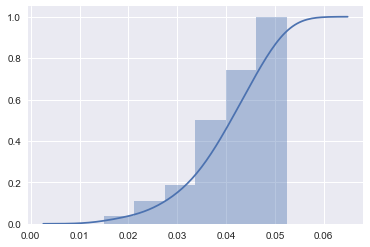

In [143]:
sns.distplot(mean_contr_user_clust1,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))

In [144]:
mean_contr_user_clust2 = clust2.mean(axis=1)
mean_contr_user_clust2.describe()

count    41.000000
mean      0.067805
std       0.010565
min       0.045000
25%       0.060000
50%       0.067500
75%       0.075000
max       0.085000
dtype: float64

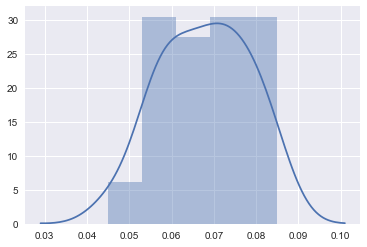

In [145]:
sns.distplot(mean_contr_user_clust2)

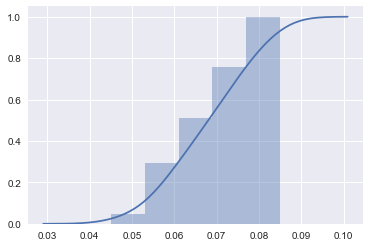

In [146]:
sns.distplot(mean_contr_user_clust2,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))

In [147]:
mean_contr_user_clust3 = clust3.mean(axis=1)
mean_contr_user_clust3.describe()

count    67.000000
mean      0.057201
std       0.009490
min       0.040000
25%       0.050000
50%       0.055000
75%       0.062500
max       0.080000
dtype: float64

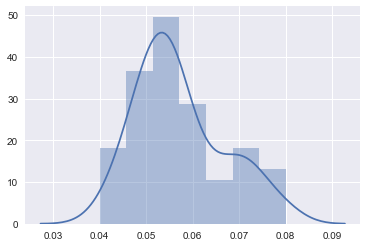

In [148]:
sns.distplot(mean_contr_user_clust3)

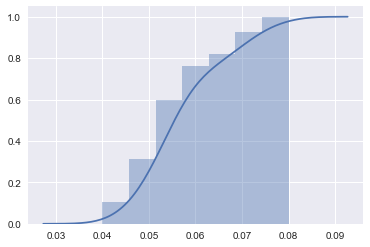

In [149]:
sns.distplot(mean_contr_user_clust3,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))

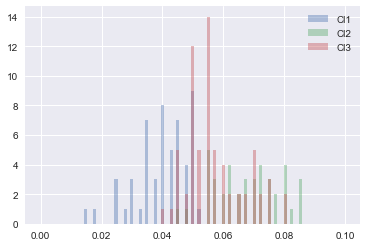

In [150]:
bins = np.linspace(0, 0.1, 100)

plt.hist(mean_contr_user_clust1, bins, alpha=0.4, label='Cl1')
plt.hist(mean_contr_user_clust2, bins, alpha=0.4, label='Cl2')
plt.hist(mean_contr_user_clust3, bins, alpha=0.4, label='Cl3')
plt.legend(loc='upper right')
plt.show()

In [151]:
#mean_contr_user_clust4 = clust4.mean(axis=1)
#mean_contr_user_clust4.describe()

In [152]:
from scipy import stats
stats.ttest_ind(mean_contr_user_clust1,mean_contr_user_clust2)

Ttest_indResult(statistic=-14.116702702376772, pvalue=7.452457027436837e-25)

In [153]:
stats.ttest_ind(mean_contr_user_clust1,mean_contr_user_clust3)

Ttest_indResult(statistic=-10.34526380105876, pvalue=2.782778278293882e-18)

In [154]:
stats.ttest_ind(mean_contr_user_clust2,mean_contr_user_clust3)

Ttest_indResult(statistic=5.3964863284997007, pvalue=4.1748857932431086e-07)

In [155]:
#stats.ttest_ind(mean_contr_user_clust1,mean_contr_user_clust4)

In [156]:
#stats.ttest_ind(mean_contr_user_clust2,mean_contr_user_clust4)

In [157]:
#stats.ttest_ind(mean_contr_user_clust3,mean_contr_user_clust4)#Només en la relació entre el cluster 3 i 4 no hi ha mitges diferents

### Other clustering methods: 

### Dendogram - Hierarchical Clustering

In [74]:
# needed imports# neede 
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

#### DAU:

In [75]:
X = np.asarray(contr_dau_norm)
# generate the linkage matrix
Z = linkage(X, 'ward')

In [145]:
c, coph_dists = cophenet(Z, pdist(X))
c

0.30483957448028776

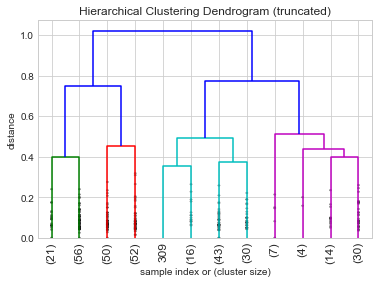

In [146]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

#### STREET

In [156]:
X = np.asarray(contr_street_norm)
# generate the linkage matrix
Z = linkage(X, 'ward')


In [157]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(X))
c

0.46278268935359179

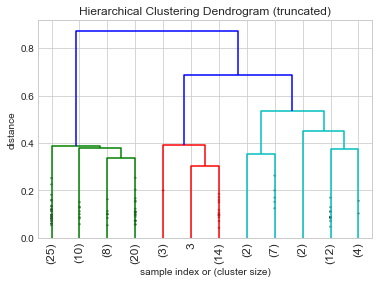

In [158]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [159]:
from scipy.cluster.hierarchy import fcluster
max_d = 0.6
clusters = fcluster(Z, max_d, criterion='distance')
y = clusters

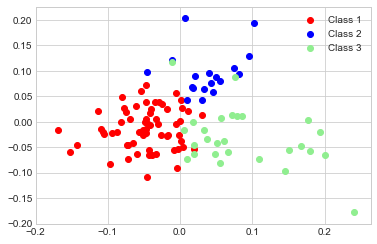

In [160]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(contr_street_norm))

plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 1', c='red')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 2', c='blue')
plt.scatter(transformed[y==3][0], transformed[y==3][1], label='Class 3', c='lightgreen')
plt.legend()
plt.show()

In [161]:
from scipy.cluster.hierarchy import fcluster
max_d = 0.8
clusters = fcluster(Z, max_d, criterion='distance')
y = clusters

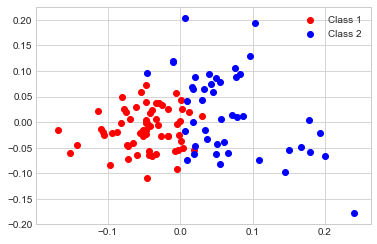

In [162]:
transformed = pd.DataFrame(pca.fit_transform(contr_street_norm))

plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 1', c='red')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 2', c='blue')
#plt.scatter(transformed[y==3][0], transformed[y==3][1], label='Class 3', c='lightgreen')
plt.legend()
plt.show()

#### Heterogènies DAU

In [97]:
ineq_dau = pd.read_csv("dades/ineq_dau.csv", delimiter=',' , encoding="latin-1")
ineq_contr_dau = contr_dau_norm[contr_dau_norm.index.isin(ineq_dau['user_id'])]

In [98]:
X = np.asarray(ineq_contr_dau)
# generate the linkage matrix
Z = linkage(X, 'ward')

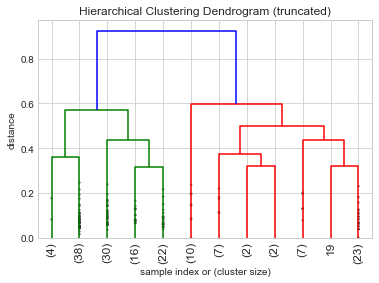

In [99]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [100]:
from scipy.cluster.hierarchy import fcluster
max_d = 0.6
clusters = fcluster(Z, max_d, criterion='distance')
y = clusters

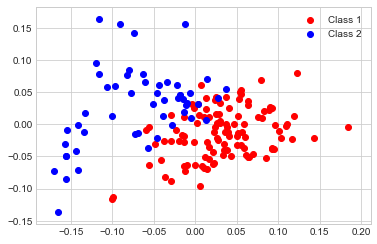

In [101]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(ineq_contr_dau))

plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 1', c='red')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 2', c='blue')
#plt.scatter(transformed[y==3][0], transformed[y==3][1], label='Class 3', c='lightgreen')
plt.legend()
plt.show()

In [102]:
from scipy.cluster.hierarchy import fcluster
max_d = 0.59
clusters = fcluster(Z, max_d, criterion='distance')
y = clusters

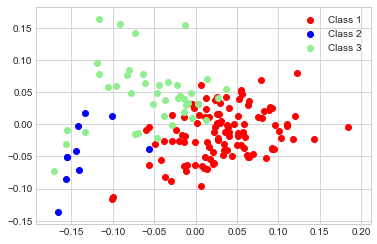

In [104]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(ineq_contr_dau))

plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 1', c='red')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 2', c='blue')
plt.scatter(transformed[y==3][0], transformed[y==3][1], label='Class 3', c='lightgreen')
plt.legend()
plt.show()

#### Homogènies DAU:

In [130]:
eq_dau = pd.read_csv("dades/eq_dau.csv", delimiter=',' , encoding="latin-1")
eq_contr_dau = contr_dau_norm[contr_dau_norm.index.isin(eq_dau['user_id'])]

In [131]:
X = np.asarray(eq_contr_dau)
# generate the linkage matrix
Z = linkage(X, 'ward')

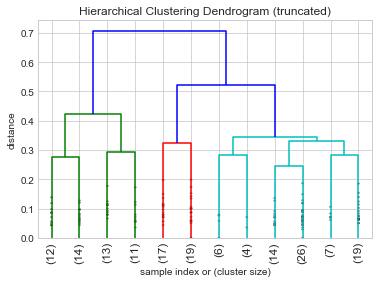

In [132]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [135]:
from scipy.cluster.hierarchy import fcluster
max_d = 0.50 # Selecting 3 clusters
clusters = fcluster(Z, max_d, criterion='distance')
y = clusters

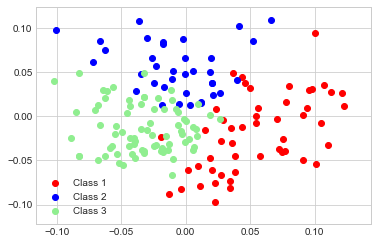

In [136]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(eq_contr_dau))

plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 1', c='red')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 2', c='blue')
plt.scatter(transformed[y==3][0], transformed[y==3][1], label='Class 3', c='lightgreen')
plt.legend()
plt.show()

In [133]:
from scipy.cluster.hierarchy import fcluster
max_d = 0.55 # Selecting 2 clusters
clusters = fcluster(Z, max_d, criterion='distance')
y = clusters

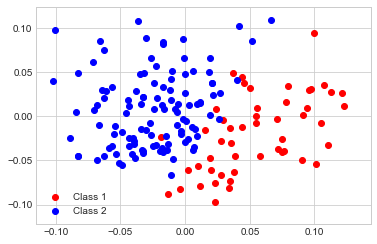

In [134]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(eq_contr_dau))

plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 1', c='red')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 2', c='blue')
#plt.scatter(transformed[y==3][0], transformed[y==3][1], label='Class 3', c='lightgreen')
plt.legend()
plt.show()

#### VIL:

In [163]:
X = contr_vil_norm
# generate the linkage matrix
Z = linkage(X, 'ward')

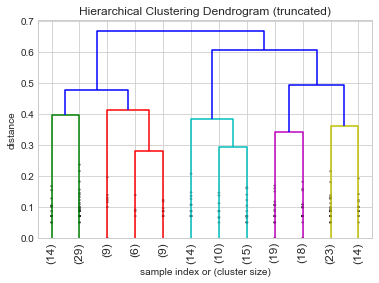

In [164]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [165]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

In [166]:
# set cut-off to 50
max_d = 0.5  # max_d as in max_distance

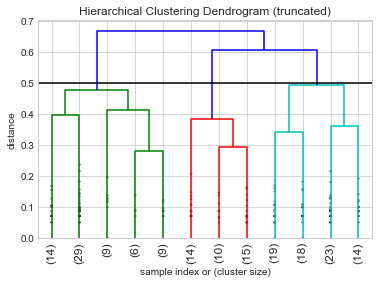

In [167]:
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    max_d=max_d,  # plot a horizontal cut-off line
)
plt.show()

#### Elbow Method
https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/#Retrieve-the-Clusters

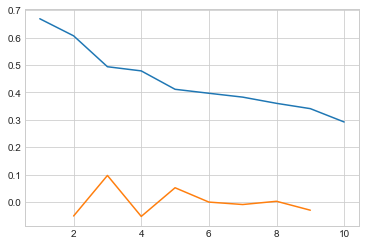

clusters: 3


In [139]:
last = Z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print ("clusters:", k)

In [168]:
from scipy.cluster.hierarchy import fcluster
max_d = 0.5
clusters = fcluster(Z, max_d, criterion='distance')
y = clusters

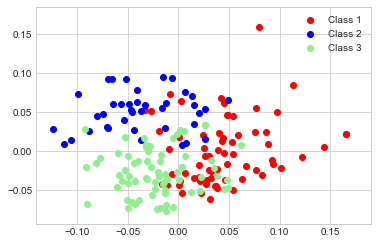

In [169]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(contr_vil_norm))

plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 1', c='red')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 2', c='blue')
plt.scatter(transformed[y==3][0], transformed[y==3][1], label='Class 3', c='lightgreen')
plt.legend()
plt.show()

## Evolution of strategies: 

In [57]:
np.mean(contr_street_norm.iloc[:,0], axis = 0)

0.06067901234567897

In [53]:
col1 = contr_street_norm.iloc[:,0:2]
col2 = contr_street_norm.iloc[:,2:4]
col3 = contr_street_norm.iloc[:,4:6]
col4 = contr_street_norm.iloc[:,6:8]
col5 = contr_street_norm.iloc[:,8:10]

In [54]:
#create new df 
df = pd.DataFrame({'col1':col1.mean(axis=1),'col2':col2.mean(axis=1),'col3':col3.mean(axis=1),
                   'col4':col4.mean(axis=1),'col5':col5.mean(axis=1), })
print (df)

             col1      col2      col3      col4      col5
user_id                                                  
1        0.066667  0.066667  0.100000  0.066667  0.066667
2        0.050000  0.025000  0.000000  0.025000  0.025000
3        0.050000  0.025000  0.025000  0.000000  0.000000
4        0.100000  0.100000  0.050000  0.100000  0.150000
5        0.050000  0.050000  0.050000  0.066667  0.050000
6        0.060000  0.080000  0.040000  0.080000  0.040000
7        0.075000  0.025000  0.075000  0.000000  0.000000
8        0.066667  0.100000  0.066667  0.033333  0.000000
9        0.150000  0.150000  0.100000  0.050000  0.000000
10       0.075000  0.075000  0.050000  0.025000  0.000000
11       0.066667  0.066667  0.066667  0.050000  0.033333
12       0.060000  0.060000  0.060000  0.080000  0.000000
13       0.050000  0.050000  0.066667  0.033333  0.033333
14       0.050000  0.100000  0.000000  0.100000  0.050000
15       0.050000  0.025000  0.050000  0.025000  0.025000
16       0.060

### At game level: 

In [2]:
ronda_dau_data = pd.read_csv("dades/ronda_dau_partida.csv", delimiter=',' , encoding="latin-1")

In [3]:
ronda_dau_data.head()

,Unnamed: 0,num_ronda,partida_id,bucket
0,1,1,1,18
1,2,2,1,20
2,3,3,1,21
3,4,4,1,12
4,5,5,1,13


In [4]:
partides_info = ronda_dau_data.pivot(index='partida_id', columns='num_ronda', values= "bucket")

In [5]:
partides_info.shape

(54, 10)

In [6]:
partides_info

num_ronda,1,2,3,4,5,6,7,8,9,10
partida_id,,,,,,,,,,
1,18,20,21,12,13,15,13,7,6,6
2,19,23,21,23,18,16,13,12,18,10
3,17,15,18,21,18,18,14,7,10,5
4,11,18,17,9,13,12,14,6,12,12
5,16,14,11,17,11,13,9,5,13,19
6,13,16,16,14,13,11,11,12,10,6
7,13,16,14,15,13,10,14,13,12,2
8,14,14,15,17,19,11,13,15,12,15
9,18,17,14,14,16,17,9,9,8,7


In [78]:
for j in range(1,partides_info.shape[1]+1):
    for i in range(1,partides_info.shape[0]+1):
        if partides_info.loc[i,j] == 12:
            partides_info.loc[i, j] = "2-M"
        elif partides_info.loc[i,j] > 12:
            partides_info.loc[i, j] = "3-H"
        else: 
            partides_info.loc[i, j] = "1-L"



In [79]:
for i in range(0,partides_info.shape[0]):
    print(list(partides_info.iloc[i]))

['3-H', '3-H', '3-H', '2-M', '3-H', '3-H', '3-H', '1-L', '1-L', '1-L']
['3-H', '3-H', '3-H', '3-H', '3-H', '3-H', '3-H', '2-M', '3-H', '1-L']
['3-H', '3-H', '3-H', '3-H', '3-H', '3-H', '3-H', '1-L', '1-L', '1-L']
['1-L', '3-H', '3-H', '1-L', '3-H', '2-M', '3-H', '1-L', '2-M', '2-M']
['3-H', '3-H', '1-L', '3-H', '1-L', '3-H', '1-L', '1-L', '3-H', '3-H']
['3-H', '3-H', '3-H', '3-H', '3-H', '1-L', '1-L', '2-M', '1-L', '1-L']
['3-H', '3-H', '3-H', '3-H', '3-H', '1-L', '3-H', '3-H', '2-M', '1-L']
['3-H', '3-H', '3-H', '3-H', '3-H', '1-L', '3-H', '3-H', '2-M', '3-H']
['3-H', '3-H', '3-H', '3-H', '3-H', '3-H', '1-L', '1-L', '1-L', '1-L']
['3-H', '3-H', '3-H', '2-M', '1-L', '1-L', '1-L', '3-H', '3-H', '1-L']
['3-H', '3-H', '3-H', '3-H', '3-H', '3-H', '2-M', '3-H', '1-L', '1-L']
['3-H', '3-H', '3-H', '3-H', '3-H', '3-H', '3-H', '1-L', '1-L', '1-L']
['3-H', '3-H', '3-H', '3-H', '3-H', '3-H', '1-L', '1-L', '1-L', '1-L']
['3-H', '2-M', '1-L', '3-H', '3-H', '3-H', '3-H', '3-H', '1-L', '1-L']
['3-H'

In [80]:
from sklearn import metrics
metrics.mutual_info_score(partides_info.iloc[0], partides_info.iloc[6], contingency=None)

0.20189814062312159

In [81]:
A = np.zeros((partides_info.shape[0],partides_info.shape[0]))
for i in range(0,partides_info.shape[0]):
    for j in range(0,partides_info.shape[0]):
        A[i,j]=metrics.mutual_info_score(partides_info.iloc[i], partides_info.iloc[j], contingency=None)


In [ ]:
print(A)

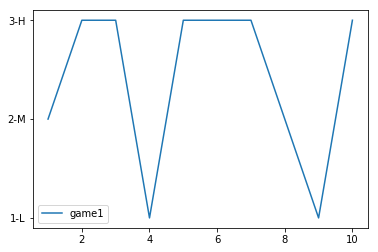

In [82]:
my_yticks = ["L","M","H"]
fig, ax = plt.subplots()
ax.plot(partides_info.columns, list(partides_info.iloc[52]), label="game1")
#ax.plot(partides_info.columns, list(partides_info.iloc[2]), label="game2")
#plt.xticks(list(partides_info.iloc[1]), my_yticks)
ax.legend()

plt.show()

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


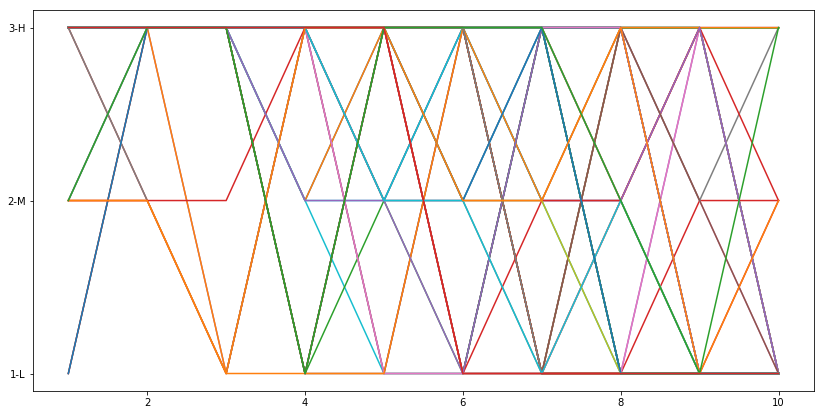

In [89]:
my_yticks = ["L","M","H"]
#fig, ax = plt.subplots(figsize=(14,7))

fig = plt.figure(figsize=(14,7))
#ax = plt.subplot(111)

for i in range(1,partides_info.shape[0]+1):
    ax = plt.subplot(111)
    ax.plot(partides_info.columns, list(partides_info.iloc[i-1]), label='$game %i$' % i)
#plt.xticks(list(partides_info.iloc[1]), my_yticks)
#ax.legend()

plt.show()

In [44]:
locs, labels = xticks()

NameError: name 'xticks' is not defined

In [2]:
dau_data = pd.read_csv("dau.csv", delimiter=',' , encoding="latin-1")
street_data = pd.read_csv("street.csv", delimiter=',' , encoding="latin-1" )

In [16]:
dau_data.drop('Unnamed: 0', axis=1, inplace=True)
street_data.drop('Unnamed: 0', axis=1, inplace=True)

In [17]:
dau_data.head()

,partida,user_id,seleccio.1,seleccio.2,seleccio.3,seleccio.4,seleccio.5,seleccio.6,seleccio.7,seleccio.8,...,comp_mean10,comp_last_mean2,comp_last_mean3,comp_last_mean4,comp_last_mean5,comp_last_mean6,comp_last_mean7,comp_last_mean8,comp_last_mean9,comp_last_mean10
0,1,1,4,3,4,3,2,2,4,3,...,0,1,1,0,1,0,1,1,1,0
1,1,2,3,4,4,3,4,4,0,0,...,1,1,1,0,1,1,0,0,0,1
2,1,3,4,4,4,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
3,1,6,2,1,4,3,2,4,4,1,...,1,0,1,0,1,1,1,0,0,1
4,1,7,2,4,2,1,1,2,1,0,...,0,1,0,0,0,0,0,0,0,0


In [41]:
dau_sel = dau_data.iloc[:,2:12].values
dau_mean = dau_data.iloc[:,14:24].values
dau_comp_mean = dau_data.iloc[:,24:34].values
dau_last_mean = dau_data.iloc[:,34:44].values

In [73]:
cond_coop = []
for i in range(np.shape(dau_sel)[0]):
    count = 0
    for j in range(1,10):
        if dau_sel[i,j]>dau_mean[i,j-1]:
            count+=1
    cond_coop.append(count)
    

[1, 5]

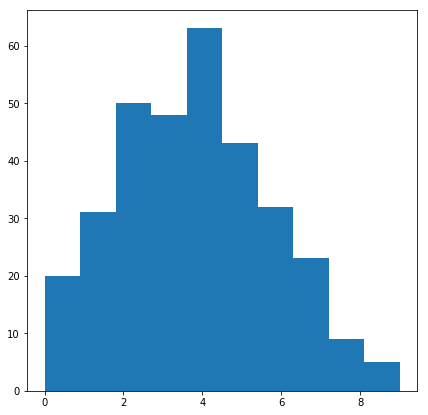

In [76]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
x = np.linspace(1, len(cond_coop), len(cond_coop))
#ax.set_title('Huber function')
#ax.set_xlabel('$u$')
#ax.set_ylabel(r'$\rho(u)$')
y = cond_coop
#plt.scatter(x, y, c="r")
plt.hist(y)
#plt.axhline(c="g")
#plt.axvline(c="g")
plt.show()